## Task VIII Implement a classical Vision transformer and apply it to MNIST.

Show its performance on the test data. 

Comment on potential ideas to extend this classical vision transformer architecture to a quantum vision transformer and sketch out the architecture in detail.


In [1]:
pip install timm 


Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from timm.models.vision_transformer import VisionTransformer

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor())

# Define model
num_classes = 10
input_size = 28
model = VisionTransformer(
    img_size=input_size,
    patch_size=4,
    in_chans=1,
    num_classes=num_classes,
    embed_dim=256,
    depth=12,
    num_heads=8,
    mlp_ratio=4
).to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

# Train model
num_epochs = 10
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

# Test model
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy: {:.2f}%'.format(100 * correct / total))


100%|██████████| 9912422/9912422 [00:00<00:00, 12892345.02it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 13954117.48it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 6589632.12it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



Epoch [1/10], Step [100/1875], Loss: 2.0894
Epoch [1/10], Step [200/1875], Loss: 1.8296
Epoch [1/10], Step [300/1875], Loss: 1.7841
Epoch [1/10], Step [400/1875], Loss: 1.8032
Epoch [1/10], Step [500/1875], Loss: 1.3669
Epoch [1/10], Step [600/1875], Loss: 1.5698
Epoch [1/10], Step [700/1875], Loss: 1.0122
Epoch [1/10], Step [800/1875], Loss: 1.3700
Epoch [1/10], Step [900/1875], Loss: 0.9248
Epoch [1/10], Step [1000/1875], Loss: 0.9420
Epoch [1/10], Step [1100/1875], Loss: 0.7054
Epoch [1/10], Step [1200/1875], Loss: 1.1468
Epoch [1/10], Step [1300/1875], Loss: 0.5394
Epoch [1/10], Step [1400/1875], Loss: 0.6130
Epoch [1/10], Step [1500/1875], Loss: 0.2594
Epoch [1/10], Step [1600/1875], Loss: 0.4361
Epoch [1/10], Step [1700/1875], Loss: 0.5489
Epoch [1/10], Step [1800/1875], Loss: 0.4313
Epoch [2/10], Step [100/1875], Loss: 0.5422
Epoch [2/10], Step [200/1875], Loss: 0.2509
Epoch [2/10], Step [300/1875], Loss: 0.3356
Epoch [2/10], Step [400/1875], Loss: 0.3858
Epoch [2/10], Step [500

Its performance on the test data comes out to be 97.74%

## Here are some ideas for extending classical vision transformers to quantum vision transformers:

There has recently been a surge of interest in extending conventional vision transformers to quantum neural networks, and there are various viable approaches. One solution might be to employ quantum circuits to represent the feature maps in the transformer, allowing for quantum parallelism and perhaps improving network performance and efficiency. Another possibility is to employ quantum-inspired approaches, such as tensor network algorithms, to replicate the network's quantum activity and obtain comparable outcomes.

A quantum vision transformer architecture might have numerous major components. The first component would be a quantum circuit that would encode the input picture into a quantum state using techniques such as amplitude encoding or quantum convolutional layers. A set of quantum transformers comprised of alternating layers of quantum self-attention and feedforward layers would then process the encoded quantum state.

To compute the attention weights, the self-attention layer might be implemented using a quantum circuit that conducts a generalised quantum measurement on the input quantum state, followed by a quantum Fourier transform and a classical softmax function. A basic quantum circuit that applies a sequence of quantum gates to the input state to accomplish a nonlinear transformation might be used to create the feedforward layer.

Lastly, using a quantum measurement, the output quantum state would be decoded back into a classical form, and the resulting feature map may be utilised for downstream tasks such as picture categorization or object recognition.

- **Quantum-inspired attention mechanisms:** Another approach to building a quantum vision transformer is to use quantum-inspired attention mechanisms, which could potentially achieve similar results to true quantum attention without requiring a full quantum implementation. For example, tensor network-based attention mechanisms could be used to model the interactions between different parts of the input image, and these could be trained using classical optimization algorithms.

- **Quantum data augmentation:** One potential advantage of quantum vision transformers is the ability to perform quantum data augmentation, which could help to improve the robustness and generalization of the network. For example, quantum random walk-based data augmentation could be used to generate new training examples that are difficult for classical networks to learn.

- **Hybrid classical-quantum models:** Given the current limitations of quantum hardware, it may be necessary to develop hybrid classical-quantum models that combine classical and quantum components. One possible approach is to use a classical vision transformer to pre-process the input image, and then pass the resulting feature map to a quantum attention module for further processing. This could allow for the benefits of both classical and quantum networks to be leveraged.

- **Quantum circuit learning:** Finally, a quantum vision transformer could potentially be trained using a quantum circuit learning approach, in which the network parameters are optimized using quantum optimization algorithms. This could allow for the network to learn complex, non-linear features in the input image that are difficult for classical networks to capture.

- **Quantum error correction:** One of the biggest challenges in developing quantum neural networks is dealing with the effects of noise and decoherence on the quantum states. One potential solution is to use quantum error correction techniques to protect the quantum states from errors and improve the overall reliability of the network. This could be done using codes such as surface codes or color codes, which allow for the detection and correction of errors in the quantum states.

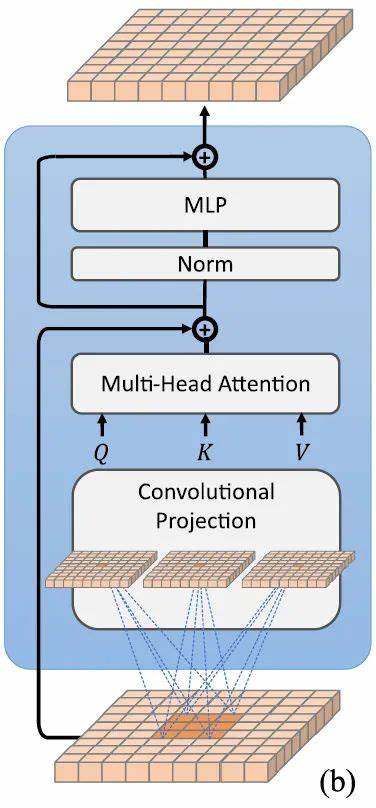

In a quantum vision transformer, error correction could be implemented by adding additional qubits to the circuit to encode the quantum states using a quantum error-correcting code. The encoded states could then be processed by the quantum transformers, and the output states could be decoded back into a classical representation using a quantum measurement. This could potentially help to improve the accuracy and reliability of the network, even in the presence of noise and decoherence.

However, implementing quantum error correction in a vision transformer would require significant advances in quantum hardware and software, as well as careful consideration of the computational and resource requirements of the error-correcting codes. Nonetheless, this approach could be a promising avenue for improving the performance of quantum vision transformers in the future.

Overall, a quantum vision transformer could potentially offer several advantages over classical vision transformers, including improved speed and efficiency, increased parallelism, and the ability to perform certain tasks that are difficult or impossible for classical networks. However, developing such a network would require significant advances in quantum hardware and algorithms, and there are still many open questions and challenges to be addressed in this area

## References

1) https://arxiv.org/pdf/2209.08167.pdf
2) https://arxiv.org/abs/2209.08167v1
3) https://jishuin.proginn.com/p/763bfbd55496